# HYPOTHESIS TESTING CASE STUDY

In [246]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats

### BUSINESS PROBLEM-1

In [2]:
ld= pd.read_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Basic Statistics - Hypothesis Testing\LoansData.csv")

In [4]:
ld.isna().sum()


Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [5]:
ld.drop(columns="Employment.Length",inplace=True)
ld.dropna(inplace=True)

In [7]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2489 non-null   float64
 1   Amount.Funded.By.Investors      2489 non-null   float64
 2   Interest.Rate                   2489 non-null   object 
 3   Loan.Length                     2489 non-null   object 
 4   Loan.Purpose                    2489 non-null   object 
 5   Debt.To.Income.Ratio            2489 non-null   object 
 6   State                           2489 non-null   object 
 7   Home.Ownership                  2489 non-null   object 
 8   Monthly.Income                  2489 non-null   float64
 9   FICO.Range                      2489 non-null   object 
 10  Open.CREDIT.Lines               2489 non-null   float64
 11  Revolving.CREDIT.Balance        2489 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [9]:
ld["Interest.Rate"] = ld["Interest.Rate"].astype(str).apply(lambda x: float(x.replace("%","")))


### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

#### Hyothesis Testing    
    h0 : interest rate is same for all loan amount 
    ha : No relationship between interest rate and loan amount

    Confidence Intreval : 95%
    pvalue : 0.05


In [306]:
stats.ttest_ind(ld["Amount.Requested"],ld["Interest.Rate"])

Ttest_indResult(statistic=79.22344297663612, pvalue=0.0)

#### BC:
    Since P value is low we reject null hypothesis 
    Interest rate is not varied according to loan amount

###  b. Loan length is directly effecting intrest rate.

In [107]:
ld["Loan.Length"] = ld["Loan.Length"].astype(str).apply(lambda x: int(x.replace(" months","")))

In [307]:
ld["Loan.Length"].value_counts()

36    1941
60     548
Name: Loan.Length, dtype: int64

In [21]:
ld["Interest.Rate"]

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest.Rate, Length: 2489, dtype: float64

#### Hypothesis Testing

    h0: Interest rate is affected by loan length(related)
    h1: Interest rate is not affected by loan length

    CI : 95%
    p value : 0.05


In [391]:
loanlength36 = ld.loc[ld["Loan.Length"]==36,["Interest.Rate"]]
loanlength60 = ld.loc[ld["Loan.Length"]==60,["Interest.Rate"]]


In [371]:
#One continous and one categorical so Annova Test

stats.f_oneway(loanlength36,loanlength60)
#stats.ttest_ind(loanlength36,loanlength60,equal_var=False)

F_onewayResult(statistic=array([546.60738917]), pvalue=array([1.91323444e-109]))

### BC:
    Since P value is low we reject null hypothesis 
    Loan length does not affect interest rate

### c. Inrest rate varies for different purpose of loans

In [113]:
ld["Loan.Purpose"].value_counts().index

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype='object')

In [114]:
#Purpose- Categorical
#Interest Rate - Continuous 

ld["Loan.Purpose"].value_counts() #cardinality is more than 2
ind = list(ld["Loan.Purpose"].value_counts().index)
#Using ANNOVA Test

In [115]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2489 non-null   float64
 1   Amount.Funded.By.Investors      2489 non-null   float64
 2   Interest.Rate                   2489 non-null   float64
 3   Loan.Length                     2489 non-null   int64  
 4   Loan.Purpose                    2489 non-null   object 
 5   Debt.To.Income.Ratio            2489 non-null   object 
 6   State                           2489 non-null   object 
 7   Home.Ownership                  2489 non-null   object 
 8   Monthly.Income                  2489 non-null   float64
 9   FICO.Range                      2489 non-null   object 
 10  Open.CREDIT.Lines               2489 non-null   float64
 11  Revolving.CREDIT.Balance        2489 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

##### Hypothesis Testing
    H0 - means are from same population(Interest rate are same for different purpose)
    Ha - means are from different population( Interst rate varies for different purspose)

    CI - 95%
    p - 0.05

In [116]:
a=dict()
for i in ind:
    a[i] = ld.loc[ld["Loan.Purpose"]==i,"Interest.Rate"]

In [117]:
stats.f_oneway( a["debt_consolidation"],a["credit_card"],a["other"],a["home_improvement"],a["major_purchase"],
               a["small_business"],a["car"],a['wedding'], a['medical'],
       a['moving'], a['vacation'], a['house'], a['educational'], a['renewable_energy'],)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

##### pvalue <0.05 We reject null hypothesis

#### Business Conclusion : Intrest rate varies for different purpose 

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [317]:
ld["Home.Ownership"].value_counts()

MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: Home.Ownership, dtype: int64

In [334]:
#TAKING MEAN OF THE FICO RANGE AS FICO SCORES
ld["Fico_Score"]=ld["FICO.Range"].apply(lambda X: np.mean([int(X.replace("-","")[:3]),int(X.replace("-","")[4:])]))

In [341]:
mapp = dict()
for i in ld["Home.Ownership"]:
    mapp[i]=ld.loc[ld["Home.Ownership"]==i,["Fico_Score"]]

dict_keys(['MORTGAGE', 'RENT', 'OWN', 'OTHER'])

#### HYPOTHESIS TESTING

    H0:Fico scores and house ownership are related
    h1: No relationship between fico scores and house ownership
    ci:95% p-value=0.05

In [342]:
stats.f_oneway(mapp["MORTGAGE"],mapp["OWN"],mapp["OTHER"],mapp["RENT"])

F_onewayResult(statistic=array([10.79035281]), pvalue=array([4.82255139e-07]))

we reject null hypothesis
#### BC: No relationship between house ownership and Fico scores

In [320]:
#obs_freq=pd.crosstab(ld["Home.Ownership"],ld["FICO.Range"])
#stats.chisquare(obs_freq)


# BUSINESS PROBLEM - 2

### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [290]:
price =pd.read_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [291]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


#### Hypothesis Testing - T test
    h0: the price will be equal
    ha: the price will not be equal
    
    CI:95% pvalue=0.05
    


In [300]:
stats.ttest_rel( price.Barry_Price, price.Mary_Price )

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

###### We reject null hypothesis
###### BC: Price will not be equal. with given data there is difference in price quoted by mary and barry

# BUSINESS PROBLEM-3:

In [359]:
tf = pd.read_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [360]:
tf.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [361]:
tf.rename(columns={"VAR4":"TRFF(%)", "VAR5":"CI(%)"},inplace=True)


In [362]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF(%)            20 non-null     float64
 4   CI(%)              20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [363]:
#2 sample paired
prior= tf.loc[(tf["Reengineer"]=="Prior")&(tf.Month.isin([13,12,11,10,9,8,7])),"CI(%)"]
#prior1 = tf.loc[(tf["Reengineer"]=="Prior"),"CI(%)"]

In [364]:
prior.shape

(7,)

In [365]:
post=tf.loc[tf["Reengineer"]=="Post","CI(%)"]

In [366]:
post.shape

(7,)

In [367]:
prior.mean()

43.487743735

In [129]:
post.mean()

23.34971927988571

### Hypothesis Testing

    h0: No changes in the CI(CI_post == CI_prior)
    ha: Changes in the CI(CI_POST <> CI_PRIOR)
    
    CI-95% P VALUE = 0.05
    2 tailed test-> p value= 0.025
    
    
    

In [368]:
stats.ttest_rel(prior,post)

Ttest_relResult(statistic=1.1053112945653105, pvalue=0.31136482510821195)

##### Pvalue is high so we fail to reject null hypothesis
##### With given data it couldnt be proved that if CI rate has improved

# BUSINESS PROBLEM -4

In [37]:
pa =pd.read_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

In [38]:
high = pa.loc[pa.Priority=="High","Days"]
medium=pa.loc[pa.Priority=="Medium","Days"]
low=pa.loc[pa.Priority=="Low","Days"]

In [46]:
pa.Priority.value_counts()


High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [135]:
high.shape

(326,)

In [137]:
medium.shape

(249,)

In [45]:
low.shape

(67,)

In [147]:
high.std()**2

60.549686550259636

In [143]:
medium.std()**2

25.116774193548416

In [148]:
low.std()**2

39.30600180913611

In [ ]:
#unqueal variance Independent T- test

#### Test if High priority tasks is done  fast
    h0: Days taken for completing high task is == Days for Medium 
    ha: days taken for completing high priority task is not equal to Medium 
    ci= 95% pvalue=0.05

In [150]:
stats.ttest_ind(high,medium,equal_var=False)

Ttest_indResult(statistic=0.9780778483608645, pvalue=0.32845956565961953)

We fail to reject Null hypothesis
#### BC : High priority task is done in same number of days as medium priority tasks

#### Test if Medium priority tasks is done  first compared to Low
    h0: Days taken for medium  = Days for Low  
    ha: days taken for Medium <>Low 
    ci= 95% pvalue=0.05

In [288]:
stats.ttest_ind(low,medium,equal_var=False)

Ttest_indResult(statistic=2.0844370107136743, pvalue=0.039955774952838315)

    We reject null hypothesis as p value is less than 0.05
#### BC: Medium priority tasks is done first before low 

### Priority: High = Medium > Low

# BUSINESS PROBLEM-5


In [156]:
Films= pd.read_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Basic Statistics - Hypothesis Testing\Films.csv")

In [157]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


### 1) What is the overall level of customer satisfaction?


In [278]:
round(Films.Overall.mean(),2)

1.62

### 2) What factors are linked to satisfaction?


In [158]:
df1=Films.loc[:,["Overall","Sinage","Parking","Clean"]]
df1=df1.dropna()


In [287]:
obs_freq=pd.crosstab(df1["Overall"],df1["Sinage"])

###### Test if Sinage is related to Overall Satisfaction
    h0: Sinage not related to overall
    ha: Sinage is related to overall 
    ci= 95% pvalue=0.05

In [162]:
obs_freq=pd.crosstab(df1["Overall"],df1["Sinage"])
stats.chi2_contingency(obs_freq)

(125.62821425534584,
 4.513620481684684e-19,
 16,
 array([[5.21538462e+01, 7.15384615e+01, 2.12307692e+01, 2.76923077e+00,
         2.30769231e+00],
        [5.49353846e+01, 7.53538462e+01, 2.23630769e+01, 2.91692308e+00,
         2.43076923e+00],
        [4.17230769e+00, 5.72307692e+00, 1.69846154e+00, 2.21538462e-01,
         1.84615385e-01],
        [3.47692308e-01, 4.76923077e-01, 1.41538462e-01, 1.84615385e-02,
         1.53846154e-02],
        [1.39076923e+00, 1.90769231e+00, 5.66153846e-01, 7.38461538e-02,
         6.15384615e-02]]))

    pvalue<0.05 -> We reject null Hypothesis
#### Sinage is related to overall satisfaction

In [164]:
obs_freq=pd.crosstab(df1["Overall"],df1["Parking"])
stats.chi2_contingency(obs_freq)

(229.34514355577116,
 8.69397796461986e-40,
 16,
 array([[6.09230769e+01, 7.06153846e+01, 1.33846154e+01, 3.23076923e+00,
         1.84615385e+00],
        [6.41723077e+01, 7.43815385e+01, 1.40984615e+01, 3.40307692e+00,
         1.94461538e+00],
        [4.87384615e+00, 5.64923077e+00, 1.07076923e+00, 2.58461538e-01,
         1.47692308e-01],
        [4.06153846e-01, 4.70769231e-01, 8.92307692e-02, 2.15384615e-02,
         1.23076923e-02],
        [1.62461538e+00, 1.88307692e+00, 3.56923077e-01, 8.61538462e-02,
         4.92307692e-02]]))

  pvalue<0.05 -> We reject null Hypothesis
#### Parking is related to overall satisfaction

In [165]:
obs_freq=pd.crosstab(df1["Overall"],df1["Clean"])
stats.chi2_contingency(obs_freq)

(123.35291804371148,
 1.2416589113321507e-18,
 16,
 array([[6.60000000e+01, 6.96923077e+01, 1.10769231e+01, 2.30769231e+00,
         9.23076923e-01],
        [6.95200000e+01, 7.34092308e+01, 1.16676923e+01, 2.43076923e+00,
         9.72307692e-01],
        [5.28000000e+00, 5.57538462e+00, 8.86153846e-01, 1.84615385e-01,
         7.38461538e-02],
        [4.40000000e-01, 4.64615385e-01, 7.38461538e-02, 1.53846154e-02,
         6.15384615e-03],
        [1.76000000e+00, 1.85846154e+00, 2.95384615e-01, 6.15384615e-02,
         2.46153846e-02]]))

  pvalue<0.05 -> We reject null Hypothesis
#### Clean is related to overall satisfaction

#### All three factors are related to overall satisfaction

### 3) What is the demographic profile of Film on the Rocks patrons?

#### Demographic Profiling based on films
    1) Gender 2) Marital_Status 3) Income 4) Age 

#### a) Gender

In [252]:
Films.Gender = Films.Gender.apply( lambda x : "Male" if(x =="1") else "Female" if(x=="2") else x)
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Movie'>

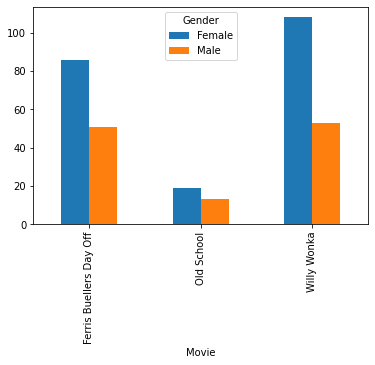

In [257]:
pd.crosstab(index=Films["Movie"],columns=Films["Gender"]).plot(kind="bar")

##### Female are more interested in the movies

#### b) Marital_Status

In [264]:
Films.Marital_Status.value_counts()
# 1 = married; 2 = single
Films.Marital_Status = Films.Marital_Status.apply(lambda x: "Single" if ((x=="2")|(x=="Slngle")) else "Married" if x=="1" else x)
Films.Marital_Status.value_counts()

Single     228
Married    100
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Movie'>

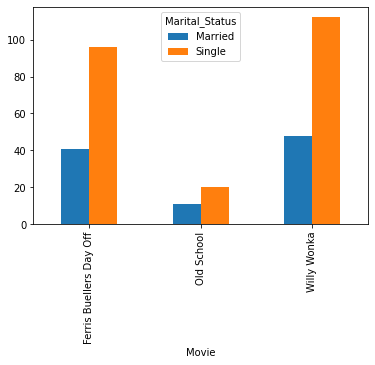

In [267]:
pd.crosstab(index=Films["Movie"],columns=Films["Marital_Status"]).plot(kind="bar")


##### Single people are more interested in movies. Willy wonka is highly watched(Both singles and married )

#### 3) Income
    1 = Less than $50,000; 2 = $50- $100,000; 3 = $100,000+

<AxesSubplot:xlabel='Movie'>

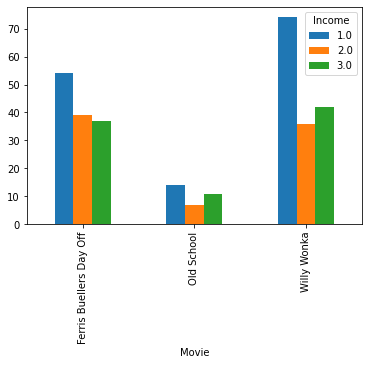

In [275]:
#
Films.Income.value_counts()
pd.crosstab(index=Films["Movie"],columns=Films["Income"]).plot(kind="bar")

#### Income level 1 people are more to the movies

#### 4) Age
    1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+

<AxesSubplot:xlabel='Movie'>

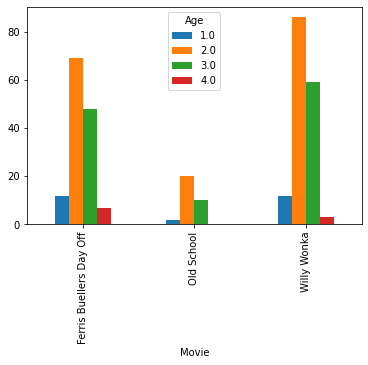

In [385]:
pd.crosstab(index=Films["Movie"],columns=Films["Age"]).plot(kind="bar")

##### Age: 2.0 ->13-30 aged people are more to movies

In [383]:
Films.Movie.value_counts()/Films.Movie.notnull().sum()

Willy Wonka                0.487879
Ferris Buellers Day Off    0.415152
Old School                 0.096970
Name: Movie, dtype: float64

##### Willy Wonka is highly watched movie followed by Ferris Buellers Day off then Old school

In [386]:
Total_Obs =Films.Hear_About.notnull().sum()

In [387]:
Total_Obs

323

### 4) In what media outlet(s) should the film series be advertised?

In [388]:
(Films.Hear_About.value_counts()/Total_Obs) *100

5      69.969040
4      12.693498
1       6.811146
3       4.334365
2       3.715170
2,5     0.619195
3,4     0.619195
1,5     0.309598
5,4     0.309598
3,5     0.309598
4,5     0.309598
Name: Hear_About, dtype: float64

#### 5 = word of mouth -> 69.9% of people  and 4 = Website(Media) -> 12.7%

